[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1jkVzPlJe1indZnIGzG9S45F5O27tppCs?usp=sharing)

*Note: GitHub.com does not render everything when viewing these notbeook files, so click the "Open in Colab" button above to see everything as it's intended.*

# Python/Jupyter Review

This course assumes some "basic" familiarity with Python (cf. ["Learn the Basics" at LearnPython.org](https://www.learnpython.org/)).  We're not going to be doing what I'd call "hardcore" Python, and many "hard" things will be taken care of for you via utility routines so you'll often only have to "fill in the blanks" here and there.

Still, there's likely some need for review as well as to highlight important "tricks", and things you maybe haven't seen before. In particular, we'll be making use of the "science stack" (e.g., `numpy`, `matplotlib`,a little `pandas`) but not the "web stack" (e.g. not Flask or Django).  So, below is a list of things you'll see in this course...

**Quick Summary:** This document has become longer and more comprehensive than I originally envisioned; I tried to order going from what I consider "most important for us" to "least important for us." Besides this ordering, the most important Pythony-things I want to emphasize for us are:
* Key Points About Python 
* Jupyter / Colab
* NumPy particulars
* Array ops > (to be preferred over) List comprehensions > (to be preferred over) Loops
* Couple of handy things: Single-line multi-assignment, i.e.  "a, b = x, y"; and putting in print statements for debugging (i.e., whenever and wherever you're unsure of something).
* Exercises, at the bottom, for practice. 

The rest, while still important, could be considered "reference material."


## Key Points about Python 

### It's superb for "messing around"
> "*Decades of programming in strongly-typed, declarative, pre- and post-allocation-based languages held me back from 'getting' this key fact about Python: It's extremely well-suited for **messing around**, ...and one of best playgrounds for messing around in is the Jupyter notebook environment.*" - S.H.

Everything is mutable, everything is overridable, everything is extendable. This is a blessing and a curse. For years I was preoccupied with the curse part, but you'll do well to remember the blessing side: you can do what you want (within limits)! 
<center><img src="https://d3qdvvkm3r2z1i.cloudfront.net/media/catalog/product/cache/1/thumbnail/85e4522595efc69f496374d01ef2bf13/d/o/dowhatiwant_newthumb-again.png" width="25%"></center>

It's not obvious that you'd want to write production code in Python: it *can* be fast, but it's not secure *at all*; for learning things and rapid prototyping though, it's awesome. 

### There's a Library/Package for Everything
I think this is another key to Python's success. Other languages have some of this (e.g. JavaScript & npm), but with Python there really is already some package that will do much of the heavy lifting for you if you want.

### Writing Fast Python is a 'Habit'

Speed matters for deep learning because we'll be dealing with *gajillions* of calculations, and the difference between 10 microseconds vs. 10 milliseconds per operation will make the difference between you getting an answer to a homework problem in a few minutes vs. a few *days*.  (Again, this is a different mindset than, say, web programming in Python, where speed matters a bit but not nearly as much.)

<center><img src="https://i2.wp.com/comicsandmemes.com/wp-content/uploads/Famous-Movie-Qoutes-1986-Top-Gun-I-feel-the-need-for-speed.jpg?resize=768%2C401&ssl=1" width="40%"></center>

When you're first starting out, it's easy to accidentally write *really slow* code, particularly if you're coming from other programming languages. Learning to think in terms of "vectorized" operations and writing "one-liners" (e.g. "list comprehensions" which often are faster that multi-line implementations) can take some getting used to but eventually becomes a habit. So in what follows, we'll talk about few speedy ways of "phrasing" things when writing Python code.

## Jupyter notebooks / Colab

You could write raw Python code as a text file and execute in the command-line (I used to do this), or use some IDE like PyCharm, but for this course we'll need access to **other people's computers** that give us access to GPUs (Graphics Processing Units) that we'll use for heavy number-crunching -- again, speed is key. 

Everything for this course is designed to be run on [Google Colab]() which is kind of a Google-Flavored version of the Jupyter environment. So, when I say "Jupyter notebooks", I mean like what the file I'm writing right now, regardless of whether it's hosted in an actual Jupyter environment (e.g. on Paperspace Gradient) or on Colab. Generally I'll assume Colab. 

(There are some special things you can do in regular-Jupyter that you can't do on Colab, and probably vice versa, but I'll try to minimize mention of those.) 

Here are a few key concepts to keep in mind:
* REPL
* Cell navigation
* Special moves: 
    * `!` shell commands 
    * `%` "magic" 
    * `?` documentation tricks 
* Colab vs. Jupyter
* Jupyter vs. IPython?



## Imports, Packages, and Modules

Usually we import "modules" from "packages". The latter are what are typically called "libraries" in other programming languages, and the modules are the various subsets of the packages -- including the package name as being itself a module.

Here are various ways of importing things:

In [7]:
import torch 
import numpy as np 
from matplotlib import pyplot 
import matplotlib.pyplot as plt 


The question of "How do I make my own Python package?" is something we can cover later.

## Key Packages For Us 
* **NumPy**: We're going to use the numerical package NumPy a *lot*, and when we compute things involving neural networks we'll use... 
* **PyTorch** for GPU-based computation. Our neural network calculations will typically exist "in" PyTorch.  PyTorch routines  usually have the same name (though not always the same keyword arguments!) as the corresponding NumPy routines. 
* **FastAI** (also fast.ai or fastai) offers some powerful and convenient abstractions on top of PyTorch and some great integrations with other technologies, so we'll use it as well. 
* **MrsPuff:** And special just for this course, I've been creating a library called "[mrspuff](https://github.com/drscotthawley/mrspuff)" that will provide other useful functions for  things I want to teach you.
<center><img src="https://github.com/drscotthawley/mrspuff/raw/master/images/mrspuff_logo.png?raw=1" width="50%"></center>
* One more I'll add: A debugging library, TBD. Both Zach Mueller and HuggingFace have recently released libraries that try to give you more helpful (than normal) error messages when something goes wrong, and suggestions on how to fix it. I'll follow up on these throughout the summer. 

Let's make sure we can install and import our key packages:

In [ ]:
# mrspuff already requires the other packages, so pip will grab them all
!pip install mrspuff | grep -v already

# Let's try to import our core packages
import numpy as np      # Everybody always abbreviates numpy as np
import torch            # The package for PyTorch is actually "torch" 
import fastai           # Usually we'll do "from fastai.xxxx import *"
import mrspuff as msp   # We may instead do "from mrspuff.xxxx import this, that

for p in [torch,fastai,msp]:  # Let's see what package versions we have
    print(f'{p.__name__} {p.__version__}')

torch 1.7.1
fastai 2.3.0
mrspuff 0.0.23


### NumPy particulars

Most of the things on this page might be review for many people, but the numpy content is crucial.  The basic datatype for numpy is the *array*, which is like a regular Python list but with many key improvements for (fast) numerical computations. 

#### Creating Arrays
There are lots of ways to create arrays, such as converting a list, or by using special routines to generate special sets of numbers.  Here are some examples:

In [ ]:
a= np.array([1,2,3,4,5,6])
print(f'a = {a}')
b = np.arange(6) # starts with 0, ends at 5
print(f'b = {b}')
print(f'c = {np.ones(6)}')
print(f'd = {np.zeros(7)}')
print(f"e = \n{np.eye(3)}")     # identity matrix "I" = "eye"
f = np.random.rand(4,5)         # random numbers between 0 and 1: 4 rows, 5 columns
print(f'f = \n{f}') 

a = [1 2 3 4 5 6]
b = [0 1 2 3 4 5]
c = [1. 1. 1. 1. 1. 1.]
d = [0. 0. 0. 0. 0. 0. 0.]
e = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
f = 
[[0.20783574 0.76401478 0.23911842 0.90923213 0.98171159]
 [0.42841005 0.46869862 0.90547014 0.42834658 0.3942568 ]
 [0.39143915 0.75108092 0.80054246 0.15198811 0.06094724]
 [0.2609732  0.68546969 0.55893476 0.04835097 0.21794896]]


#### Array Properties & Operations
* `shape` is a tuple tells you that the number of rows and columns (and any other further array dimensions).  This is probably the most important property you will need to be checking and getting right! Mistakes made when writing neural network code are usually -- with some enormously high probability -- about array shape mismatches. 

In [ ]:
f.shape 

(4, 5)

* mathematical operations, which are either appended with a `.` or prepended with an `np.` (sometimes either way, sometimes only one way), e.g.:

In [ ]:
print(f'f.mean() = {f.mean()}')
print(f'np.abs(f) = \n{np.abs(f)}')  # absolute value, note it's np.abs(f) not f.abs() ?
# the axis keyword can say along which axis (rows, columns..) the op is applied over
print(f'np.mean(f, axis=0) = {np.mean(f, axis=0)}')   
print(f'np.max(f,axis=1) = {np.max(f,axis=1)}')  # gets the max element 
print(f'np.argmax(f,axis=1) = {np.argmax(f,axis=1)}')  # gets the location of the max element 
print(f'f.sum(axis=1) = {f.sum(axis=1)}')
print(f'f.T = \n{f.T}')  # Transpose, reverses rows & columns
print(f'f.shape = {f.shape}, f.T.shape = {f.T.shape}')
# change the rows x column shape but # of elements must remain unchanged:
print(f'np.reshape(f, (2,10))  = \n{np.reshape(f, (2,10))}')  

f.mean() = 0.48273851513282884
np.abs(f) = 
[[0.20783574 0.76401478 0.23911842 0.90923213 0.98171159]
 [0.42841005 0.46869862 0.90547014 0.42834658 0.3942568 ]
 [0.39143915 0.75108092 0.80054246 0.15198811 0.06094724]
 [0.2609732  0.68546969 0.55893476 0.04835097 0.21794896]]
np.mean(f, axis=0) = [0.32216453 0.667316   0.62601644 0.38447945 0.41371615]
np.max(f,axis=1) = [0.98171159 0.90547014 0.80054246 0.68546969]
np.argmax(f,axis=1) = [4 2 2 1]
f.sum(axis=1) = [3.10191266 2.62518219 2.15599788 1.77167758]
f.T = 
[[0.20783574 0.42841005 0.39143915 0.2609732 ]
 [0.76401478 0.46869862 0.75108092 0.68546969]
 [0.23911842 0.90547014 0.80054246 0.55893476]
 [0.90923213 0.42834658 0.15198811 0.04835097]
 [0.98171159 0.3942568  0.06094724 0.21794896]]
f.shape = (4, 5), f.T.shape = (5, 4)
np.reshape(f, (2,10))  = 
[[0.20783574 0.76401478 0.23911842 0.90923213 0.98171159 0.42841005
  0.46869862 0.90547014 0.42834658 0.3942568 ]
 [0.39143915 0.75108092 0.80054246 0.15198811 0.06094724 0.260973

* **Vectorizing** = speed. Treat arrays as single objects, then operations can be applied to all elements at once very quickly. For example:

In [ ]:
g = np.random.rand(1000,10000)   # define lots of numbers

In [ ]:
%%timeit                # handy trick for timing code
a = g/2  # treat f like a single thing

100 loops, best of 5: 15.2 ms per loop


In [ ]:
%%timeit
a = np.empty(g.shape)
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        a = g[i,j]/2      # try to operate on each element in succession

1 loop, best of 5: 5.85 s per loop


* **Slicing** is super-important. It's how we specify subsets of arrays. Typically, this is done with numbers specifying array indices to slice at, the colon `:` to denote "wildcard" values, and commas to separate axes. Note that negative indices are counted backwards from the end of the array. Here are some examples:



In [ ]:
a = np.arange(12).reshape((3,4))
print(f'a = \n{a}')
print(f'a[:,2] = {a[:,2]}')  # the second column; but not it will become a 1.array
print(f'a[:,2,np.newaxis] = \n{a[:,2,np.newaxis]}') # newaxis can create an axis if one was lost
print(f'a[1:,:-1] = {a[1:,-1]}') # all rows after the first one, and the last column
print(f'a[::-1] = {a[::-1]}')    # reverse the array!

a = 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a[:,2] = [ 2  6 10]
a[:,2,np.newaxis] = 
[[ 2]
 [ 6]
 [10]]
a[1:,:-1] = [ 7 11]


Sliced sections of arrays are called "views": they are not re-generated as new arrays, they are just "views" of the old array.  If you want to add or operate on slices of arrays, they must have the same shape.

*Tip:* Note that array indexes can *only* be integers and that Python division via `/` naturally produces floats, so if your slicing involves division you may need to wrap it in an `int()` type-cast. 

* **Broadcasting** is the exception to arrays being the same shape.  It lets you combine a large array with a smaller one in certain ways:

In [ ]:
print(f"a + 5 = \n{a+5}") # We can broadcast scalars
try: print(f"a + np.ones(2) = {a+np.ones(2)}")
except ValueError: 
    print("ValueError: operands could not be broadcast together with shapes (3,4) (2,)")

a + 5 = 
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
ValueError: operands could not be broadcast together with shapes (3,4) (2,)


Ohhh woopsie.  See, the shapes didn't match. How about if we match the last dimension (4)...?

In [ ]:
print(f"a + np.ones(3) = \n{a+np.ones(4)}")

a + np.ones(3) = 
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


Good. See, in order for arrays to be in joint operations together, the *last dimension* (in this case, 4) has to be the same.  What NumPy does is it creates a "broadcast view" of the smaller array to where it's the same size as the big array, i.e. it creates, in the example above, a 3x4 array of ones out of the 4-element array of ones. Then it adds these two "big arrays" together. 

* `random` and seed

## Functions & Methods

Functions are decleared with `def`. They accept positional arguments or "args" `(a,b,c)` as well as named keyword arguments or "kwargs" denoted by equals signs (`thing=12, foo=None`) where the thing after the equals sign serves as a default value for that variable.

Functions return things; by default they return `None`, but they can be used to return numbers, lists, arrays, tuples, whatever. 

Here's a sample function:

In [1]:
def raiseto(x, power=2):
  return x**power

print(raiseto(5))
print(raiseto(5,3))

25
125






### lambda is just a function with no name
I'm not going to make you write "lambda" functions, but if you see one don't worry, it's the same as an unnamed function (e.g. there's no "def __name__()"). And because everything is mutable, you can *give it* a name. So the following 3 snippets do the same thing:

In [ ]:
def a(x): return x+5
print("a =",a(4))

b = lambda x: x+5 
print(f"b = {b(4)}")

a = 9
b = 9


...Oh yea, see in that last line I used a "f-string." They've been a feature since Python 3.5. We'll use them a lot because I think they're great. But if you try to use an older Python interpreter (e.g. Python 2.7), you'll get a syntax error.  Actually everything we'll be doing will assume at least Python 3.6. Let's see what version we're running:

In [ ]:
import sys
print(f"Python version is {sys.version}")

Python version is 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


### Generators are not that bad
A [generator](https://www.learnpython.org/en/Generators) is just a function with the word "yield" in it (which functions kind of like "return") and they can be used as iterators (e.g., for loops & list comprehensions).  Here's a generator. 

In [ ]:
def gen(z, step=1):
    count = 0
    for i in range(z):       # this is a standard for loop, see below
        count += step
        yield(count)

print([x for x in gen(10)])  # this is a list comprehension, see below
print([x for x in gen(10,step=-2)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-2, -4, -6, -8, -10, -12, -14, -16, -18, -20]


Generators are often used to supply the next batch of data to something, like we'll do when training our neural networks.  But this will mostly be done for us by our library routines; I don't think you'll need to write your own generators. 


## Classes 

Classes are collections of handy routines and properties that you want to group together. Now, in this class, you won't have to *make your own classes* (much), rather you'll be making heavy use of other people's classes.  But I think it's easier to understand *other people's* classes in terms of what it means to create your own class. Usually, what happens is you start to accumulate a bunch of methods for a particular task or thing or "object", and you think to yourself, "it would be nice if I packaged all these together".  That's where classes come in. 

Classes are defined via `class`, and  usually inherit from (or "overload") some `super` class. Classes have an `__init__()` function that is called when the class is instantiated. They can store various variables that are accessible after a dot (`.`) and have "methods" that are just functions inside the class. One thing to note is that the class-method-functions always take the positional argument `self` first. 

Here's an example:



In [5]:
class MyClass():     # oh yea, and by convention, classes are usually named in uppercase / "camel case"
    #         ^inheritance would go in the ()'s, e.g. "(nn.Module)" in PyTorch. 
    def __init__(self, x, b=12):
        self.storethis = x
        self.b = b 
    
    def dosomething(self, input=6):
        out = self.storethis + self.b  - input 
        return out

q = MyClass(5, b=5)
print(q.dosomething())
print(q.dosomething(1))

4
9


## Data types

### Tuples
Tuples are arguably the fundamental thing we deal with in Python. Anything separated by a comma is technically a tuple. Usually, they're surrounded by parentheses as in `(a,b,c)` but often the parentheses are optional, as in single-line multi-assignment:
```
a, b = 1, 2
```
This is the same as writing `(a,b) = (1,2)`. Tuples have an order and can be indexed but are *immutable*, meaning they can't be changed after you make one. (So if you try to re-assign an element of a tuple, you'll get an error).  This is in contrast to lists (below) which are *mutable*. 

### Lists 

Lists are like tuples but they're mutable and are denoted by square brackets instead of parentheses.  You can have lists of any kind of datatype, including multiple datatypes, and you can have lists of lists. And those sub-lists don't even have to be similar. This is in contrast to NumPy arrays, where the datatypes and lengths of sub-arrays (higher-order axes) must all be the same. 

In many (many) cases, tuples and lists are interchangeable and if you're wondering "should I use parentheses or square brackets", the answer is "it doesn't matter".  But if you plan on changing anything, then use square brackets. 


#### Extra: FastAI "L" lists 
The FastAI sub-library "[fastcore](https://fastcore.fast.ai/)" (as in `from fastcore.basics import *`) introduces a "super" list denoted by [`L()`](https://fastcore.fast.ai/#L).  These objects are just like regular lists but can do more, and bear similarities to NumPy arrays in that they support advanced slicing and other array-like properties. We may or may not make much use of `L()` objects but if you see one, just think of it as a normal list. [You may read more about L() here](https://fastcore.fast.ai/#L).


### Dictionaries (or "dicts")
[Dictionaries](https://www.learnpython.org/en/Dictionaries) are kind of like lists, except that they use curly braces instead of square brackets, and rather than being indexible by integers, they're indexable by...whatever, usually strings), and also: the order of items in dicts is never guaranteed.  They're great, especially as fast "[hashes](https://en.wikipedia.org/wiki/Hash_function)", i.e. as fast look-up-functions between two sets of data.  The Pandas data science library is largely based on dictionaries. Here's a sample "dict", which can serve as a "grab bag":

In [ ]:
a = {'a': 1, 'b': 2, 5:6, 'Japan':'Tokyo'}

Dicts are arranged in "key:value" pairs: you can think of it as a look-up table where the key is the query and the value is the thing it points to:

In [ ]:
a['Japan']

'Tokyo'

To add on to dicts or combine them: sadly unlike lists you can't just add them. Instead, [there are a few ways](https://www.geeksforgeeks.org/python-merging-two-dictionaries/); an easy one is "update" (as opposed to "append" for lists):

In [ ]:
a.update({'hot dog':'frankfurter'})
a

{5: 6, 'Japan': 'Tokyo', 'a': 1, 'b': 2, 'hot dog': 'frankfurter'}

You'll see dicts when we're mapping strings to other strings, such as in Natural Language Processing (NLP) or sometimes when working with filenames.


### Sets
We don't use Python sets much, but they're handy in certain cases such as when you want to eliminate duplicate elements, e.g. 

In [ ]:
list(set([1,2,3,3,3,4,4,5,6]))

[1, 2, 3, 4, 5, 6]

## Loops
Different ways of writing loops can be faster or slower than others, and it depends on the application and the number of iterations. Generally,
* Try to avoid using loops for simple things, instead prefer vectorized numpy operations, e.g. use `.mean()` on a NumPy array instead of  looping over all elements and keeping a running sum and then dividing by the number of iterations.

In [ ]:
arr = np.random.rand(99999999)  # generate lots o' numbers

In [ ]:
%%timeit
arr.mean()

10 loops, best of 5: 72.4 ms per loop


In [ ]:
%%timeit 
sum, n = 0, len(arr)
for i in range(n):
    sum += arr[i]
mean = sum/n

1 loop, best of 5: 27 s per loop


...yeah.  Which one is faster?


* When we write loops, there are 3 main ways we do it. Letting y denote some iterator such as `range(n)` or a list, then these 3 ways are:
   1. standard loops: `for x in y: _somthing_involving_x` (and yes, loops can be one-liners or they can span multiple lines)
   2. list comprehensions: `[_somthing_involving_x for x in y]`
   3. (more advanced) `map` operations: `_some_list_ = list(map(func, y))`

Handy loop iterators:
* range 
* enumerate() & zip() 

If you're looping in order to build up a bunch of data or do a bunch of single operations, then [List comprehensions](https://www.learnpython.org/en/List_Comprehensions) usually preferable.  

Let's do a comparison:

## Plotting:
There are a few different plotting packages we'll use.  
* **matplotlib**: The "standard" Python plotting package is [matplotlib](https://matplotlib.org/), which we will invariably use via `import matplotlib.pyplot as plt` and then do everything with `plt.whatever()`.  In regular-Jupyter, there are various modes for matplotlib, including interactive modes, but for Colab, there is only one mode supported called "inline", and it's enabled by default.
* **Plotly**: is good for 3D plots that are interactive.  
* **Bokeh**: is another good interactive (2D) package that we'll use sometimes. 


Here's a protypical example matplotlib plot:

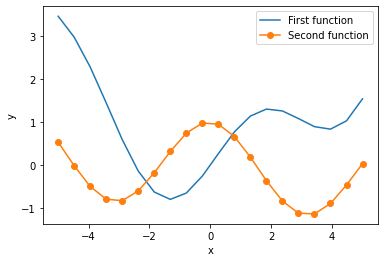

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(-5, 5, num=20)
y = np.sin(x) + 0.1*x**2    # just some function to plot
y2 = np.cos(x) - 0.05*x    # some other function to plot
plt.plot(x, y, label="First function")
plt.plot(x, y2, 'o-', label="Second function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

You can add all kinds of things to the plot such as titles and text in various places, set ranges for the axes, and various markers for data points, and combine multiple graphs, and even 3D plots. See the [matplotlib](https://matplotlib.org/) site for details and (many) examples. 

## Pandas:
[Pandas](https://pandas.pydata.org/) is an important part of the "data science stack" for Python, and contains many handy features. One feature I tend to use it for is anything involving reading or writing of CSV or JSON files.  We probably won't make much other use of Pandas in this course. 

## What about Scikit-Learn?
[scikit-learn](https://scikit-learn.org/) is a *great* Machine Learning package that allows one to easily try out all kinds of different methods and approaches. We may use parts of it here and there for its utility routines, but since this is a Deep Learning course, we'll focus on the more specialized PyTorch and FastAI libraries. 

# Practice Exercises
These exercises are for your practice. These are in contrast to Homework assignments, which will be graded (automatically by an autograder program).

## Exercise 1:
Create a function called "square_half" that will accept a positive integer n, and from that return two arrays. The first will be an array of successive values from 1 to n, and the second will consist of only the first n/2 perfect squares. Hint: Note that you might need to wrap something in an "int()". 

In [ ]:
def square_half(n):  # Don't change this line
    # Your code here. You may assume n is a positive integer, but feel free to check for this! 

    return    # return two arrays, separated by a comma

You can test your function with the following code. If any of these fail and you can't figure out why, you may want to try giving a small number for `n` and then add `print` statements to see what your arrays actually contain. 

In [ ]:
n = 10000
a, a_sq = square_half(n)

no2 = int(n/2)
assert a.shape[0]==n, f"You should have {n} values in the first array but instead you have {a.shape[0]}"
assert a_sq.shape[0]==no2, f"You should have {no2} values in the 2nd array but instead you have {a_sq.shape[0]}"
assert np.array_equal(np.ones(n)*(n+1), a+a[::-1]) and ((a[1:]-a[:-1]).sum())==n-1, '...successive values...'
assert a[0] == 1, "...from 1..."
assert a[-1] == n, f"...to n,"
assert np.array_equal(a_sq/a[:no2], a[:no2]), '...consisting of...perfect squares'

import time
n = 10000000
start = time.perf_counter()
a, a_sq = square_half(n)
stop = time.perf_counter()
elapsed = stop-start
assert elapsed  < 0.035, f"Elapsed time = {elapsed} s: a bit slow.'+\
    'Try re-running this cell and if you still don't pass on the 2nd try, you may need to rewrite something."
print("All tests passed! Congratulations!")

These kinds of "assertion checks" are exactly how your homework assignments will be auto-graded:  The autograder script will call your function with various inputs and check them against expected outputs. 

## Exercise 2:
Create a simple function that returns just the "stem" of a word, removing things like "ing", "ed", "s" from the end of a word. Note: such a function will be too simple for "real use", in practice we will use "tokenizer" functions from libraries such as [NLTK](https://www.nltk.org/):

In [ ]:
def stemify(word): # leave this part alone
    # your code here

    return    # remember to return a variable here!

And here are some tests you can run. (Remember you can add your own print statement to see the output from your `stemify()` function.)

In [ ]:
assert stemify('rowing')=='row', "Didn't remove the -ing"
assert stemify('ingot')=='ingot', "Only remove -ing from the end"
assert stemify('wounded')=='wound', "Remove -ed"
assert stemify('educate')=='educate', "Only remove -ed from the end"
assert stemify('frogs')=='frog', "Take the s off the end"
assert stemify('Sussudio')=='Sussudio', "Only take the s off the end"
print("All tests passed! Congratulations!")

All checks passed! Congratulations!


Again, this is just a simple exercise. You can probably easily imagine examples to break this or render nonsense (e.g., `stemify("running")=="runn"`, `stemify("sing")=="s"`), but it's handy exercise to get you working. ;-) 

## Exercise 3:
Create a routine that returns a 2D array of dimensions `nrows, ncols` in which the array elements are the sum of the (zero-indexed) row and column numbers.  (Extra effort: Can you do it as one-liner?)

In [ ]:
def rowcolsum(nrows, ncols):  # leave this line alone
    # your code here

    return 

Here are some tests:

In [ ]:
assert np.array_equal(rowcolsum(2,3), np.array([[0, 1, 2],[1, 2, 3]]))
assert np.array_equal(rowcolsum(1,2), np.array([[0, 1]]))
assert np.array_equal(rowcolsum(1,1), np.array([[0]]))
print("All tests passed! Congratulations!")

## Exercise 4:
Given a 2D numpy array, return the maximum value along each row.  (This is super handy and we'll do this a lot).  Hint: this can easily be done with a single line, and may even strike some readers as bewilderingly easy!  
"Extra credit:" Can you make it so it returns the maximum element along whatever the last dimension of an array is (e.g. even for a 3D array)? (Which, ok, arguably might no longer be called a "row", but bear with me for now.)
Often it's handy to write routines in such a way that they will work regardless of the dimensionality of the array. 

In [ ]:
def max_on_row(a):   # don't change this line.  "a" is your array
    # your code below
    

Here are some tests you can run. 

In [ ]:
np.random.seed(0)
a = np.random.rand(4,5)
b = max_on_row(a)
assert len(a.shape) == len(b.shape)+1
assert np.abs(b - np.array([0.71518937, 0.96366276, 0.92559664, 0.87001215])).sum() < 1e-6, "Not as expected"
d = max_on_row(np.random.rand(2,2,2))
assert np.abs(d - np.array([[0.97861834,0.78052918], [0.63992102,0.94466892]])).sum() < 1e-6, "3D array: Not as expected"
print("All tests passed! Congratulations!")

All tests passed! Congratulations!


---
(c) 2021 Scott H. Hawley 